# bootstrap

* $\theta$ - истинное значение статистики
* $\theta^*$ - распределение значений статистики по бутстрапированной выборке
* $\hat{\theta}$ - значение статистики по исходной выборке
* $\alpha$ - вероятность ошибки первого рода
* $\hat{se^*}_{\theta^*}$ - стандартное отклонение бутстрап-выборки по конкретной бутстрап-выборке))))
* ${\widetilde{\alpha}/2}, {1-\widetilde{\alpha}/2}$ - специальные квантили для BCa bootstrap
* $\hat{se}_{\theta^*}$ - стандартное отклонение статистики по бутстрапированной выборке

$\begin{array}{|c|c|c|c|}
\hline Тип & ДИ & \text {Плюсы} & \text {Минусы}\\
\hline \text {Наивный / percentile}
 & [\theta^*_{\alpha/2}; \theta^*_{1-\alpha/2}] &
 \text {Интуитивно понятный} &
\text{Ломается при смещённом значении бутстрап-статистики} \\
\hline \text {Базовый / reverse percentile}
 & [2\hat{\theta}-\theta^*_{1-\alpha/2}; 2\hat{\theta}-\theta^*_{\alpha/2}] &
  \text {Математически обоснован} &
  \text{Одна из границ может оказаться нелогичной} \\
\hline \text{t-bootstrap}
 & [\hat{\theta}-t^*_{1-\alpha/2}\cdot \hat{se^*}_{\theta^*};
    \hat{\theta}-t^*_{\alpha/2}\cdot \hat{se^*}_{\theta^*}]
  & \text {Все плюсы параметрических гипотез}
 & \text{Вычислительно сложный} \\
\hline \text{BCA bootstrap}
 & [\hat{\theta}_{\widetilde{\alpha}/2};
    \hat{\theta}_{1-\widetilde{\alpha}/2}]
  & \text {Коррекция на смещение}
 & \text{Накладывает требования на параметричность статистики} \\
 \hline \text{Normal bootstrap}
 & [\hat{\theta}-z^*_{1-\alpha/2}\cdot \hat{se}_{\theta^*};
    \hat{\theta}-z^*_{\alpha/2}\cdot \hat{se}_{\theta^*}]
  & \text {Просто считать}
 & \text{Требует асимптотически нормального распределения бутстрап-статистики} \\
\hline
\end{array}$

[Вывод формулы для reverse percentile](https://i.imgur.com/9Isk14X.png)

## Мотивационный пример

Пусть на основе выборки $X_1,$ $\ldots$, $X_n$ мы каким-то способом получили точечную оценку неизвестного параметра $\theta$ и обозначили её $\hat{\theta}$. Теперь наша цель состоит в том, чтобы построить асимптотический доверительный интервал для $\theta$, но при этом мы не знаем, какому распределению принадлежит $\theta$.

 Bootstrap предлагает оценить дисперсию $\hat{\theta}$ на основе тех же данных, на которых была получена сама оценка $\hat{\theta}$.

Вспомним, что *построением выборки (sampling)* называется выбор элементов генеральной совокупности (какого-то множетства или распределения). Случайная выборка строится путём случайного выбора наблюдений. Случайную выборку можно строить двумя способами:
- без возвращения (without replacement, simple random sampling),
- с возвращением (with replacement).

**Вопросы на подумать:**
1. Можно ли рассматривать построение выборки с возвращением из множества $\{1, 2, \ldots, 8\}$ как процедуру последовательного подбрасывания восьмигранной кости?

*Построением boostrap-выборки (resampling)* называется **построение выборки с возвращением из эмпирического распределения**.

**Пример 1:** пусть имеется набор чисел $1$, $1$, $2$, $3$, $10$, $11$, $11$, который рассматривается как выборка, взятая из какого-то распределения. Чтобы построить выборку с возвращением из эмпирического распределения, мы должны сложить эти числа в шляпу и не глядя вытаскивать их одно за другим, записывая результат и возвращая число обратно.

**Формально:** пусть дана выборка $X_1$, $\ldots$, $X_n$. Построением boostrap-выборки называется выбор номера $i$ из равновероятного на $\{1, 2, \ldots n\}$ распределения и взятие $X_i$ как одного значения этой выборки.

**Продолжение примера 1:** пусть мы хотим построить boostrap-выборку размера 3 для чисел из примера 1. Тогда мы можем подбросить семигранную (так как семь наблюдений) кость три раза и, например, получить:
$$
3, 3, 7, 1
$$
Тогда boostrap-выборка будет:
$$
2, 2, 11, 1
$$

Будем обозначать boostrap-выборку как $X_1^*$, $\ldots$, $X_m^*$.

## Эмпирический bootstrap.

*Выборкой эмпирического bootstrap* нызвается boostrap-выборка того же размера, что и оригинальная выборка:

для выборки $X_1$, $\ldots$, $X_n$ это $X_1^*$, $\ldots$, $X_n^*$. Тогда boostrap говорит, что $F \approx F^*$, а дисперсия статистики, рассчитанной на основе выборки $X$, примерно равна дисперсии статистики, рассчитанной на основе $X^*$.

## Зачем это нужно?

У нас есть выборка, нам кажется, что наблюдаемые значения распределены нормально, но p-value гипотезы о принадлежности наблюдаемой выборки нормальному распределению $<0.05$. Чтобы не лукавить при использовании теорем, основанных на принадлежности данного распределения нормальному, не будем принимать гипотезу и оцениваем требуемые доверительные параметров с помощью бутстрапирования, а не традиционных формул.

In [47]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Пусть дана выборка из некоторого распределения с конечным матожиданием $\mu$:

In [48]:
X = [30, 37, 36, 43, 42, 43, 43, 46, 41, 42]

### Percentile bootstrap

Постройте 80% доверительный интервал для $\mu$.

80% ДИ для среднего, построенный с помощью percentile bootstrap
ConfidenceInterval(low=38.4, high=42.0)


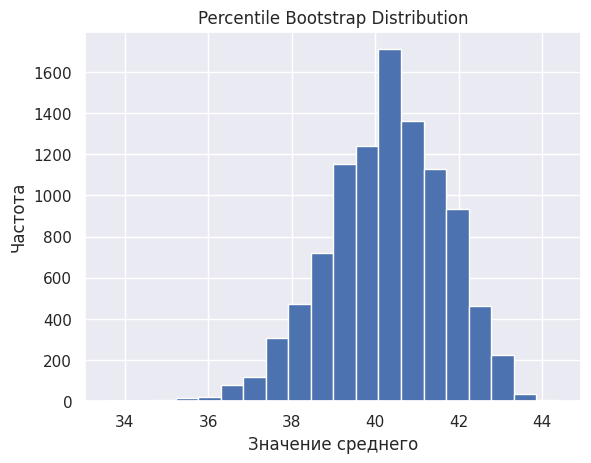

In [49]:
res = stats.bootstrap((X, ), np.mean, confidence_level=0.8, method='percentile')
print('80% ДИ для среднего, построенный с помощью percentile bootstrap')
print(res.confidence_interval)

fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=20)
ax.set_title('Percentile Bootstrap Distribution')
ax.set_xlabel('Значение среднего')
ax.set_ylabel('Частота')
plt.show()

Постройте 80%-ый доверительный интервал для медианы.

80% ДИ для медианы, построенный с помощью percentile bootstrap
ConfidenceInterval(low=39.0, high=43.0)


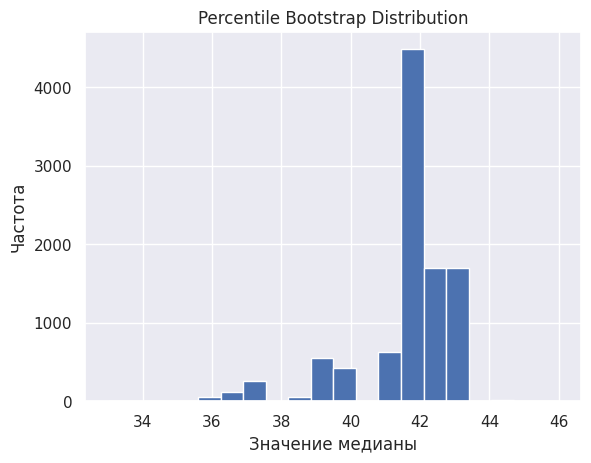

In [50]:
res = stats.bootstrap((X, ), np.median, confidence_level=0.8, method='percentile')
print('80% ДИ для медианы, построенный с помощью percentile bootstrap')
print(res.confidence_interval)

fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=20)
ax.set_title('Percentile Bootstrap Distribution')
ax.set_xlabel('Значение медианы')
ax.set_ylabel('Частота')
plt.show()

### Reverse percentile bootstrap

Постройте 80% доверительный интервал для $\mu$.

In [51]:
## Шаг 1: Найдите точечную оценку неизвестного параметра
# (ML)
mu_hat = np.mean(X)
mu_hat

40.3

Мы бы хотели найти распределение величины $d = \hat{X} - \mu$, потому что тогда мы можем построить доверительный интервал для $\mu$ как
$$
P(d_{0.9} \le \bar{X} - \mu \le d_{0.1}) = 0.8 \Rightarrow \mu \in [\bar{x} - d_{0.1}; \bar{x} - d_{0.9}].
$$

Boostrap говорит, что распределение $d$ можно приблизить распределением $d^* = \bar{x^*} - \bar{x}$.

Удача заключается в том, что можно сгенерировать $d^*$ сколько угодно раз, а потому возможно получить достаточно точную оценку распределения $d^*$.

In [52]:
## Шаг 2: Сгенерируйте 20 bootstrap-выборок из X и сохраните их в матрицу n x 20
np.random.seed(1234)
bootstrap_samples = np.random.choice(X, size = (len(X), 2000), replace = True)
bootstrap_samples

array([[43, 43, 43, ..., 46, 42, 46],
       [30, 42, 37, ..., 41, 46, 43],
       [41, 42, 30, ..., 41, 43, 43],
       ...,
       [43, 43, 43, ..., 41, 43, 41],
       [36, 30, 42, ..., 43, 30, 42],
       [41, 30, 46, ..., 37, 37, 42]])

In [53]:
# Шаг 3: Рассчитайте выборочное среднее по каждой bootstrap-выборке
bootstrap_means = np.mean(bootstrap_samples, axis = 0)
bootstrap_means

array([38.9, 38.7, 39.6, ..., 40.2, 40.7, 42.8])

In [54]:
# Шаг 4: Рассчитайте d*
d_star = bootstrap_means - mu_hat
d_star

array([-1.4, -1.6, -0.7, ..., -0.1,  0.4,  2.5])

In [55]:
d_star_quant = np.quantile(d_star, (0.1, 0.9))
d_star_quant

array([-1.9,  1.7])

In [56]:
# Шаг 5: Найдите 0.1 и 0.9 квантили для d_star
d_star_quant = np.quantile(d_star, (0.1, 0.9))
d_star_quant

array([-1.9,  1.7])

In [57]:
# Шаг 6: Постройте 80%-ый доверительный интервал для mu
LB = mu_hat - d_star_quant[1]
UB = mu_hat - d_star_quant[0]
print('[', LB, ';', UB, ']')

[ 38.599999999999994 ; 42.199999999999996 ]


80% ДИ для медианы, построенный с помощью reverse percentile bootstrap
ConfidenceInterval(low=38.599999999999994, high=42.099999999999994)


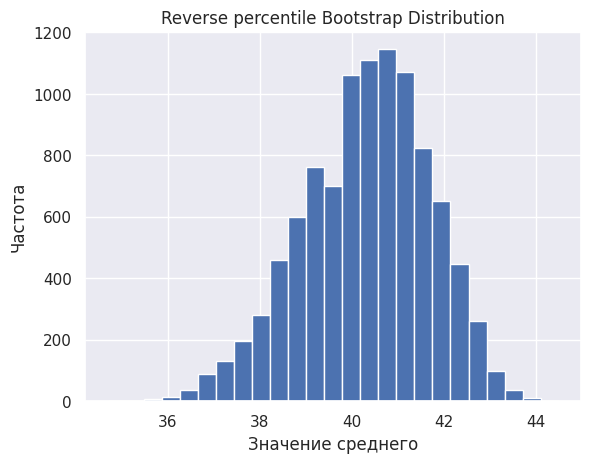

In [58]:
res = stats.bootstrap((X, ), np.mean, confidence_level=0.8, method='basic')
print('80% ДИ для медианы, построенный с помощью reverse percentile bootstrap')
print(res.confidence_interval)

fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25)
ax.set_title('Reverse percentile Bootstrap Distribution')
ax.set_xlabel('Значение среднего')
ax.set_ylabel('Частота')
plt.show()

**Пример 3:** для той же выборки постройте 80%-ый доверительный интервал для медианы.

In [59]:
from seaborn.algorithms import bootstrap
## Шаг 1: Найдите точечную оценку неизвестного параметра
med = np.median(X)
print(med)
## Шаг 2: Сгенерируйте 100 boostrap-выборок из X и сохраните их в матрицу n x 100
bootstrap_samples = np.random.choice(X, size = (len(X), 10000), replace = True)
# Шаг 3: Рассчитайте выборочную медиану по каждой bootstrap-выборке
bootstrap_medians = np.median(bootstrap_samples, axis = 0)
# Шаг 4: Рассчитайте d*
d_star = bootstrap_medians - med
print(d_star)
# Шаг 5: Найдите 0.1 и 0.9 квантили для d_star
d_star_quant = np.quantile(d_star, (0.1, 0.9))
print(d_star_quant)
# Шаг 6: Постройте 80%-ый доверительный интервал для медианы
LB = med - d_star_quant[1]
UB = med - d_star_quant[0]
print('[', LB, ';', UB, ']')

42.0
[ 0.   0.  -2.5 ...  0.  -5.5  1. ]
[-3.  1.]
[ 41.0 ; 45.0 ]


80% ДИ для медианы, построенный с помощью reverse percentile bootstrap
ConfidenceInterval(low=41.0, high=45.0)


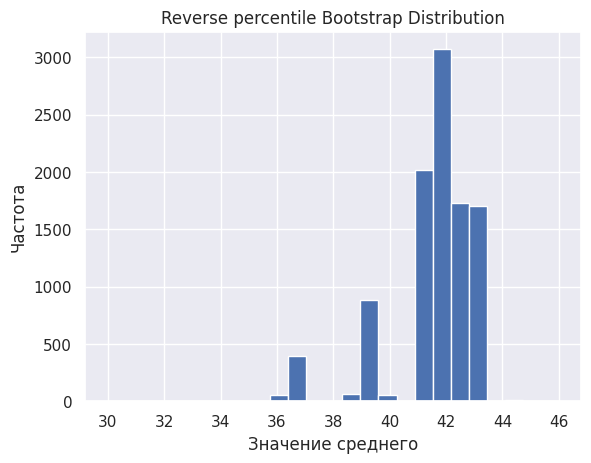

In [60]:
res = stats.bootstrap((X, ), np.median, confidence_level=0.8, method='basic')
print('80% ДИ для медианы, построенный с помощью reverse percentile bootstrap')
print(res.confidence_interval)

fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25)
ax.set_title('Reverse percentile Bootstrap Distribution')
ax.set_xlabel('Значение среднего')
ax.set_ylabel('Частота')
plt.show()

### 2. t-bootstrap

Хотим посчитать ДИ. используя следующую формулу:

$$ [\hat{\theta}-t^*_{1-\alpha/2}\cdot \hat{se^*}_{\theta^*}; \hat{\theta}-t^*_{\alpha/2}\cdot \hat{se^*}_{\theta^*}]$$

[Берём формулы и алгоритм отсюда](http://st47s.com/Math154/Notes/boot.html)

1. Считаем $\hat{\theta}$ по исходной выборке
2. Генерируем бутстрэп-выборку $X^*_i$ и считаем $\theta^*_i$
3. Для данной бутстрэп-выборки генерируем ещё какое-то количество бутстрэп выборок, по которым считаем стандартное отклонение статистики $\hat{se}^*_i$
4. Считаем новую статистику $T^*_i=\frac{\theta^*_i-\hat{\theta}}{\hat{se}^*_i}$
5. На основе $T^*$ считаем квантили распределения ($t_{\alpha/2}, t_{1-\alpha/2}$)
6. Считаем $\hat{se^*}_{\theta^*} = \sqrt{ \frac{1}{B-1}\sum\limits_{i=1}^B (\theta^*_i-\overline{\theta}^*)^2}$
7. Применяем формулу

**Пример 4:** для той же выборки постройте 80%-ый доверительный интервал для $\mu$.

In [83]:
bootstrap_samples.shape

(10, 100)

In [87]:
bootstrap_ses = []

## Шаг 1: Найдите точечную оценку неизвестного параметра
x_hat = np.mean(X)
## Шаг 2: Сгенерируйте 100 boostrap-выборок из X и сохраните их в матрицу n x 100
bootstrap_samples = np.random.choice(X, size = (len(X), 10000), replace = True)
# Шаг 2: Рассчитайте выборочное среднее по каждой bootstrap-выборке
bootstrap_means = np.mean(bootstrap_samples, axis = 0)

# Шаг 3: Генерируем подвыборки, по которым считаем стандартное отклонение
for i in range(bootstrap_samples.shape[1]):
  bootstrap_subsamples = np.random.choice(bootstrap_samples[:, i], size = (len(X), 100), replace=True)
  bootstrap_subsamples_mean = np.mean(bootstrap_subsamples, axis = 0)
  bootstrap_ses.append(np.std(bootstrap_subsamples_mean))
bootstrap_ses = np.array(bootstrap_ses)

# Шаг 4: Рассчитайте T
T = (bootstrap_means - x_hat) / bootstrap_ses
# Шаг 5: Найдите 0.1 и 0.9 квантили для t_star
T_quantiles = np.quantile(T, (0.1, 0.9))

# Шаг 6: посчитайте стандартное отклонение для подстановки в формулу
bootstrap_std = np.std(bootstrap_means)

# Шаг 7: Постройте 80%-ый доверительный интервал для mu
LB = x_hat - T_quantiles[1] * bootstrap_std
UB = x_hat - T_quantiles[0] * bootstrap_std
print('[', LB, ';', UB, ']')

[ 37.17400110008262 ; 42.021122778125786 ]


### BCA Bootstrap

Один из самых мощных вариантов бутстрапа, скорректированный на смещение статистики.

Хотим посчитать ДИ, используя следующую формулу:

$$ [\hat{\theta}_{\widetilde{\alpha}/2}, \hat{\theta}_{1-\widetilde{\alpha}/2}]$$

Казалось бы, обычный перцентильный бутстрэп, в чём прикол? А прикол здесь в том, каким образом считаются $\widetilde{\alpha}$

[Берём формулы и алгоритм отсюда](https://www.erikdrysdale.com/bca_python/)

1. $\widetilde{\alpha}/2 = \Phi(\hat{z}_0+\frac{\hat{z}_0+\hat{z}_{\alpha/2}}{1-\hat{\alpha}(\hat{z}_0+\hat{z}_{\alpha/2})})$
2. $1-\widetilde{\alpha}/2 = \Phi(\hat{z}_0+\frac{\hat{z}_0+\hat{z}_{1-\alpha/2}}{1-\hat{\alpha}(\hat{z}_0+\hat{z}_{1-\alpha/2})})$
3. Для вычисления этих статистик, нам нужно посчитать ещё $\hat{z}_0$ и $\hat{\alpha}$
4. $\hat{z}_0 = \Phi^{-1} (\frac{1}{B}\sum\limits_{i=1}^B I\{\theta_i^*<\hat{\theta}\})$
5. $\hat{\alpha} = \frac{\sum\limits_{i=1}^B(\overline{\theta}^{-i} - \hat{\theta}^{-i})^3}{6\cdot \left[\sum\limits_{i=1}^B(\overline{\theta}^{-i} - \hat{\theta}^{-i})^2\right]^{1.5}}$

6. $\Phi(.)$ - эмпирическая функция распределения бутстрапированной выборки
7. $\overline{\theta}^{-i}$ - статистика Jackknife

Не будем мучиться с реализацией данного метода и просто возьмём реализацию из scipy

In [62]:
X

[30, 37, 36, 43, 42, 43, 43, 46, 41, 42]

80% ДИ для среднего, построенный с помощью BCa
ConfidenceInterval(low=38.1, high=41.8)


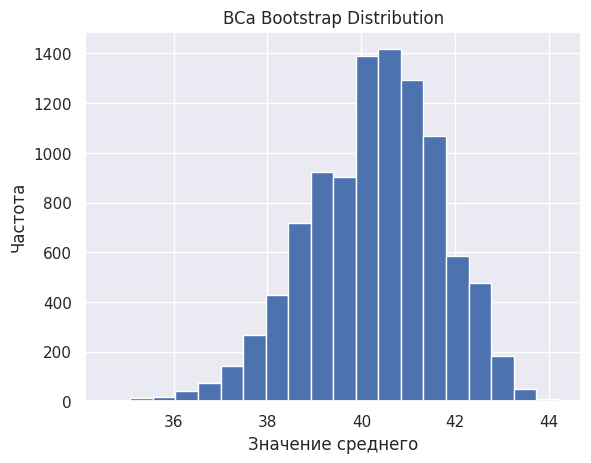

In [63]:
res = stats.bootstrap((X, ), np.mean, confidence_level=0.8, method='BCa')
print('80% ДИ для среднего, построенный с помощью BCa')
print(res.confidence_interval)

fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=20)
ax.set_title('BCa Bootstrap Distribution')
ax.set_xlabel('Значение среднего')
ax.set_ylabel('Частота')
plt.show()

80% ДИ для медианы, построенный с помощью BCa
ConfidenceInterval(low=nan, high=nan)


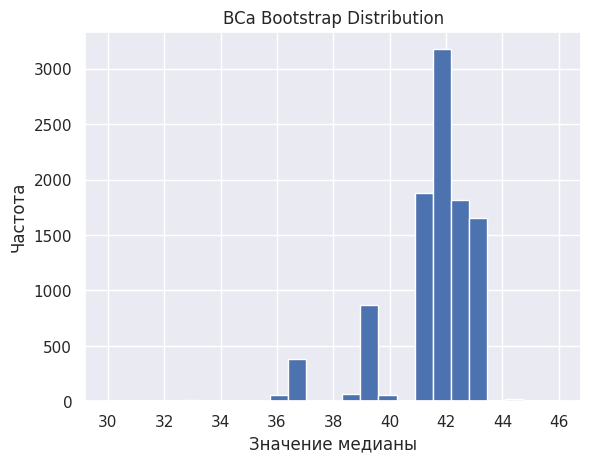

In [64]:
res = stats.bootstrap((X, ), np.median, confidence_level=0.8, method='BCa')
print('80% ДИ для медианы, построенный с помощью BCa')
print(res.confidence_interval)

fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25)
ax.set_title('BCa Bootstrap Distribution')
ax.set_xlabel('Значение медианы')
ax.set_ylabel('Частота')
plt.show()

### Что получилось?

In [90]:
np.mean(X)

40.3

In [89]:
np.sort(X)

array([30, 36, 37, 41, 42, 42, 43, 43, 43, 46])

80% доверительный интервал для среднего:
* Percentile - [38.4, 42.0]
* Reverse Percentile - [38.6, 42.2]
* t - [37.2, 42.0]
* BCa - [38.1, 41.8]

## bootstrap для ДИ метрик модели ML

Продолжим работать с идеей рекламной платформы, в рамках которой теперь будем строить модель определения возраста пользователей.

Для начала сгенерируем данные, которые задаются следующей моделью

$$Age = min\{70, max\{10, 30 -1.5 \log(\# views_{cybersport})-1.2\log(\# views_{anime})+0.4\log(\# views_{politics})+0.6\log(\# views_{auto})+2\log(\# views_{health})+\varepsilon\}\}$$

* $Age$ - возраст пользователя
* $\# views_{cybersport}$ - количество просмотров страниц, связанных с темой "Киберспорт" за последние 30 дней
* $\# views_{anime}$ - количество просмотров страниц, связанных с темой "Аниме" за последние 30 дней
* $\# views_{politics}$ - количество просмотров страниц, связанных с темой "Политика" за последние 30 дней
* $\# views_{auto}$ - количество просмотров страниц, связанных с темой "Авто" за последние 30 дней
* $\# views_{health}$ - количество просмотров страниц, связанных с темой "Здоровье" за последние 30 дней
* $\varepsilon \sim N(0, 10)$ - не учтённые моделью признаки

При этом каждая из переменных просмотра той или иной категории распределена как смесь пуассоновских распределений, зависящих от категории возраста пользователя (<25 - молодёжь, $\ge 25$ - нууу не молодёжь)

In [65]:
sample_teenagers = {'cybersport_views': [],
                        'anime_views': [],
                        'politics_views': [],
                        'auto_views': [],
                        'health_views': []}

for theme, lambd in zip(sample_teenagers.keys(), [0, 1, 2, 3, 4]):
  print(theme, lambd)

cybersport_views 0
anime_views 1
politics_views 2
auto_views 3
health_views 4


<Axes: >

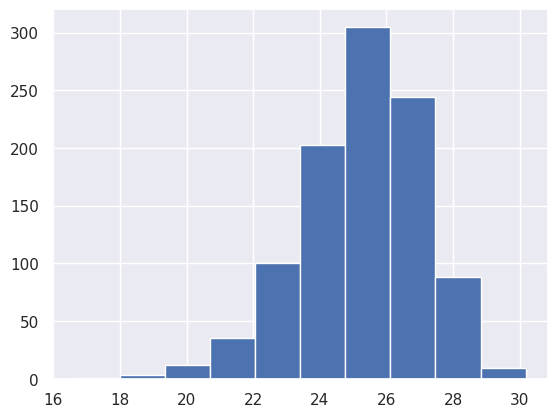

In [66]:

def generate_data(sample_size=1000, sigma = 10,
                  pattern_distribution = [0.3, 0.7],
                  cybersport_lambda = [5, 0.2],
                  anime_lambda = [2, 0.3],
                  politics_lambda = [6, 20],
                  auto_lambda = [2, 7],
                  health_lambda = [1, 6],
                  seed = 2023):
    """Генерирует данные с количеством просмотров пользователем различных категорий на основе параметров пуассоновских распределений

    """

    sample = {'teenagers_pattern_group': {'cybersport_views': [],
                        'anime_views': [],
                        'politics_views': [],
                        'auto_views': [],
                        'health_views': []},
              'adult_pattern_group': {'cybersport_views': [],
                                  'anime_views': [],
                                  'politics_views': [],
                                  'auto_views': [],
                                  'health_views': []}}

    data = []
    np.random.seed(seed)
    for i, group in enumerate(sample.keys()):
        # print(i, group)
        sample[group]['pattern_group'] = group
        for dict_cat, category in zip(sample[group].keys(), [cybersport_lambda, anime_lambda, politics_lambda, auto_lambda, health_lambda]):

          # print(dict_cat, category)
          sample[group][dict_cat] = np.random.poisson(category[i], int(sample_size*pattern_distribution[i]))

        tmp = pd.DataFrame(sample[group])
        tmp['age'] = 35-1.0*np.log2(tmp.cybersport_views+1)\
                       -0.5*np.log2(tmp.anime_views+1) \
                       +1.0*np.log2(tmp.politics_views+1) \
                       +1.5*np.log2(tmp.auto_views+1) \
                       +2.0*np.log2(tmp.health_views+1)\
                       +np.random.normal(0, sigma)
        tmp.loc[tmp['age']<10, 'age'] = 10
        tmp.loc[tmp['age']>70, 'age'] = 70

        # print(len(tmp))
        data.append(tmp)

    return pd.concat(data).reset_index(drop=True)

data = generate_data()
data.age.hist()

In [67]:
data['is_teenager'] = 1
data.loc[data.age>=25, 'is_teenager'] = 0

In [68]:
data[data.columns[:5]]

,cybersport_views,anime_views,politics_views,auto_views,health_views
0,4,3,8,2,1
1,3,1,3,2,1
2,5,1,3,0,0
3,3,2,5,3,2
4,2,4,5,0,1
...,...,...,...,...,...
995,1,2,16,8,8
996,0,0,20,8,4
997,0,0,23,7,5
998,0,0,14,8,4


In [156]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(data[data.columns[:5]],
                                                    data[data.columns[-1]],
                                                    test_size=0.2,
                                                    random_state=2023)

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('accuracy %.4f' % accuracy_score(y_test, y_pred))
print('F1 %.4f' % f1_score(y_test, y_pred))

accuracy 0.8250
F1 0.7977


### визуализируем

In [102]:
!pip install -qq umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.2 MB/s eta 0:00:00


In [99]:
data.dtypes

cybersport_views      int64
anime_views           int64
politics_views        int64
auto_views            int64
health_views          int64
pattern_group        object
age                 float64
is_teenager           int64
dtype: object

In [106]:
import umap
import plotly.express as px

trimap_viz = umap.UMAP()
tmp = data[data.columns[:5]].copy()
trimap_embedding = trimap_viz.fit_transform(tmp)

fig = px.scatter(x=trimap_embedding[:, 0],
                 y=trimap_embedding[:, 1],
                 color=data[data.columns[-1]])
fig.show()

In [107]:
trimap_test_embedding = trimap_viz.transform(X_test)

fig = px.scatter(x=trimap_test_embedding[:, 0],
                 y=trimap_test_embedding[:, 1],
                 color=y_test,
                 hover_name=y_pred)
fig.show()

### бутстрапируем

In [157]:
test = np.vstack([y_test.to_numpy(), y_pred])
test.shape

(2, 200)

In [158]:
accuracies, f1_scores = [], []
for i in range(10000):
  indicies = np.random.choice(np.arange(test.shape[1]), size=test.shape[1])
  sample = test[:, indicies]
  accuracies.append(accuracy_score(sample[0], sample[1]))
  f1_scores.append(f1_score(sample[0], sample[1]))

<ipython-input-159-04599efa025a>:6: VisibleDeprecationWarning:

Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.



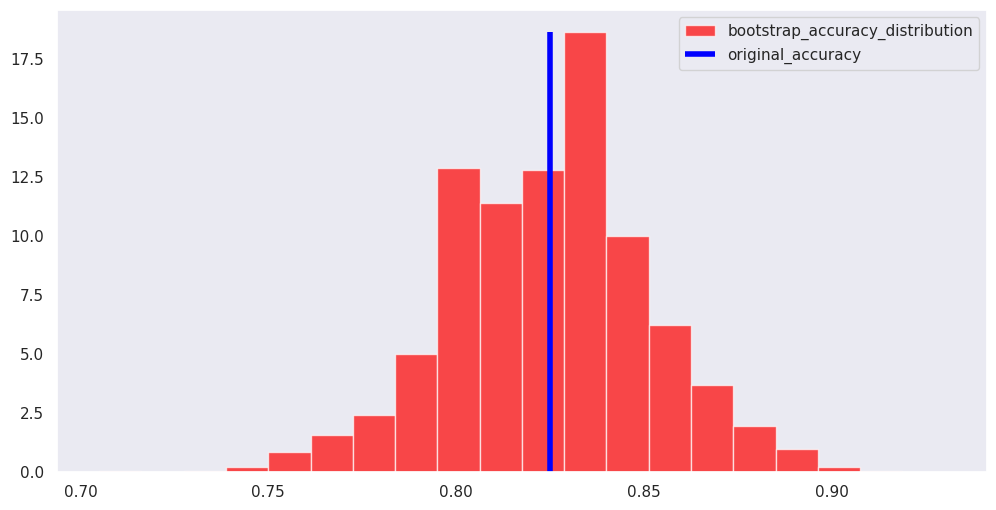

In [159]:
plt.figure(figsize=(12, 6))
plt.hist(accuracies, bins=20,
         label='bootstrap_accuracy_distribution',
         color='red', alpha=0.7, density=True)
plt.vlines(accuracy_score(y_test, y_pred),
           ymin=0, ymax=np.histogram(accuracies, bins=20, normed=True)[0].max(),
           label='original_accuracy', color='blue', linewidth=4)
plt.grid()
plt.legend()
plt.show()

In [162]:
def get_normal_ci(bootstrap_stats, original_stat, alpha):
    """Строит нормальный доверительный интервал."""
    z = stats.norm.ppf(1 - alpha / 2)
    se = np.std(bootstrap_stats)
    left, right = original_stat - z * se, original_stat + z * se
    print('normal [%.4f, %.4f]' % (left, right))
    return left, right

def get_percentile_ci(bootstrap_stats, alpha):
    """Строит перцентильный доверительный интервал."""
    left, right = np.quantile(bootstrap_stats, [alpha / 2, 1 - alpha / 2])
    print('percentile [%.4f, %.4f]' % (left, right))
    return left, right

def get_pivotal_ci(bootstrap_stats, original_stat, alpha):
    """Строит центральный доверительный интервал."""
    left, right= 2 * original_stat - np.quantile(bootstrap_stats, [1 - alpha / 2,  alpha / 2])
    print('inverse percentile [%.4f, %.4f]' % (left, right))
    return left, right

normal [0.7723, 0.8777]
percentile [0.7700, 0.8750]
inverse percentile [0.7750, 0.8800]


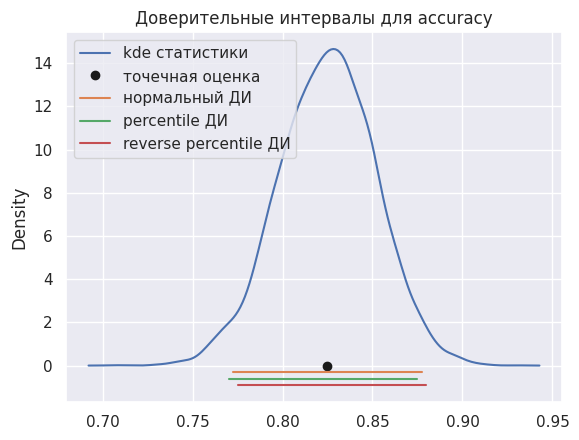

In [163]:
alpha = 0.05
normal_ci = get_normal_ci(accuracies, accuracy_score(y_test, y_pred), alpha)
percentile_ci = get_percentile_ci(accuracies, alpha)
pivotal_ci = get_pivotal_ci(accuracies, accuracy_score(y_test, y_pred), alpha)

sns.kdeplot(accuracies, label='kde статистики')
plt.plot([accuracy_score(y_test, y_pred)], [0], 'o', c='k', markersize=6, label='точечная оценка')
d = 0.3
plt.plot(normal_ci, [-d, -d], label='нормальный ДИ')
plt.plot(percentile_ci, [-d*2, -d*2], label='percentile ДИ')
plt.plot(pivotal_ci, [-d*3, -d*3], label='reverse percentile ДИ')

plt.title('Доверительные интервалы для accuracy')
plt.legend()
plt.show()

<ipython-input-165-b4c814a92ba2>:6: VisibleDeprecationWarning:

Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.



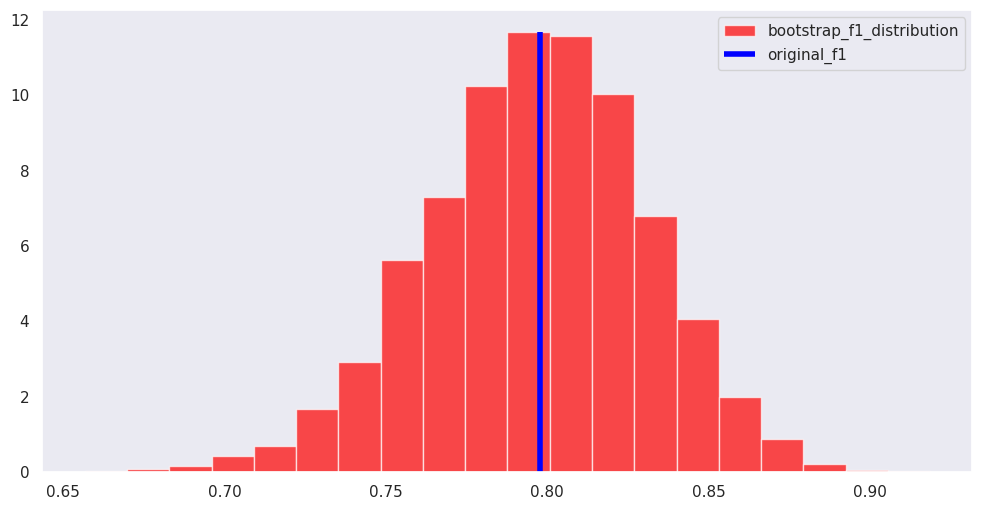

In [165]:
plt.figure(figsize=(12, 6))
plt.hist(f1_scores, bins=20,
         label='bootstrap_f1_distribution',
         color='red', alpha=0.7, density=True)
plt.vlines(f1_score(y_test, y_pred),
           ymin=0, ymax=np.histogram(f1_scores, bins=20, normed=True)[0].max(),
           label='original_f1', color='blue', linewidth=4)
plt.grid()
plt.legend()
plt.show()

normal [0.7316, 0.8638]
percentile [0.7273, 0.8600]
inverse percentile [0.7354, 0.8681]


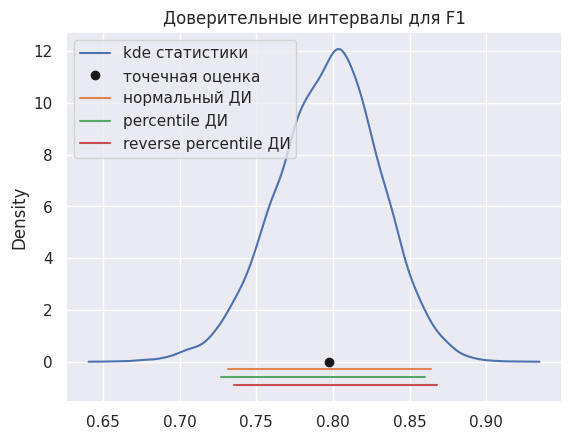

In [166]:
normal_ci = get_normal_ci(f1_scores, f1_score(y_test, y_pred), alpha)
percentile_ci = get_percentile_ci(f1_scores, alpha)
pivotal_ci = get_pivotal_ci(f1_scores, f1_score(y_test, y_pred), alpha)

sns.kdeplot(f1_scores, label='kde статистики')
plt.plot([f1_score(y_test, y_pred)], [0], 'o', c='k', markersize=6, label='точечная оценка')
d = 0.3
plt.plot(normal_ci, [-d, -d], label='нормальный ДИ')
plt.plot(percentile_ci, [-d*2, -d*2], label='percentile ДИ')
plt.plot(pivotal_ci, [-d*3, -d*3], label='reverse percentile ДИ')

plt.title('Доверительные интервалы для F1')
plt.legend()
plt.show()

## bootstrap для ДИ оценки параметров модели машинного обучения

Допустим, мы хотим посчитать ДИ для количества *support vectors* в обученной модели (индикатор того, насколько однородны данные: если сильно меньше половины выборки - данные однородны, если примерно равно половине выборки - сложно полагаться на данную модель, поскольку ей едва хватило данных из обучения для подбора разделяющей гиперплоскости)

In [127]:
model.support_

array([  0,   2,   7,   8,  11,  18,  19,  21,  22,  25,  28,  30,  33,
        34,  36,  37,  46,  53,  61,  65,  69,  72,  74,  80,  81,  82,
        89,  91,  95, 103, 104, 110, 114, 121, 130, 131, 132, 137, 140,
       144, 145, 148, 152, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       172, 173, 175, 188, 197, 212, 213, 215, 216, 220, 228, 230, 233,
       236, 241, 242, 245, 247, 250, 251, 255, 256, 257, 259, 261, 266,
       269, 270, 271, 274, 277, 282, 289, 291, 293, 295, 298, 299, 302,
       308, 311, 316, 319, 320, 322, 326, 329, 330, 331, 335, 339, 340,
       341, 345, 350, 351, 352, 381, 382, 385, 389, 390, 391, 395, 397,
       402, 405, 413, 417, 418, 420, 422, 423, 426, 427, 428, 431, 437,
       438, 439, 445, 449, 450, 454, 457, 460, 466, 467, 468, 470, 473,
       475, 481, 483, 489, 491, 494, 498, 500, 504, 505, 506, 512, 527,
       538, 545, 547, 557, 560, 563, 564, 565, 566, 568, 573, 577, 581,
       583, 586, 588, 590, 594, 601, 609, 611, 612, 621, 625, 62

In [130]:
original_n_support = model.n_support_[0]
original_n_support

221

In [144]:
bootstrap_n_support = []
for i in range(1000):
  indicies = np.random.choice(np.arange(len(X_train)), size=len(X_train))
  X_train_bootstrap = X_train.to_numpy()[indicies, :]
  y_train_bootstrap = y_train.to_numpy()[indicies]
  model = SVC()
  model.fit(X_train_bootstrap, y_train_bootstrap)
  bootstrap_n_support.append(model.n_support_[0])
  if i % 100 == 0:
    print(model.n_support_[0])

220
226
224
220
204
207
212
216
195
213


<ipython-input-167-8284f2bf333e>:7: VisibleDeprecationWarning:

Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.



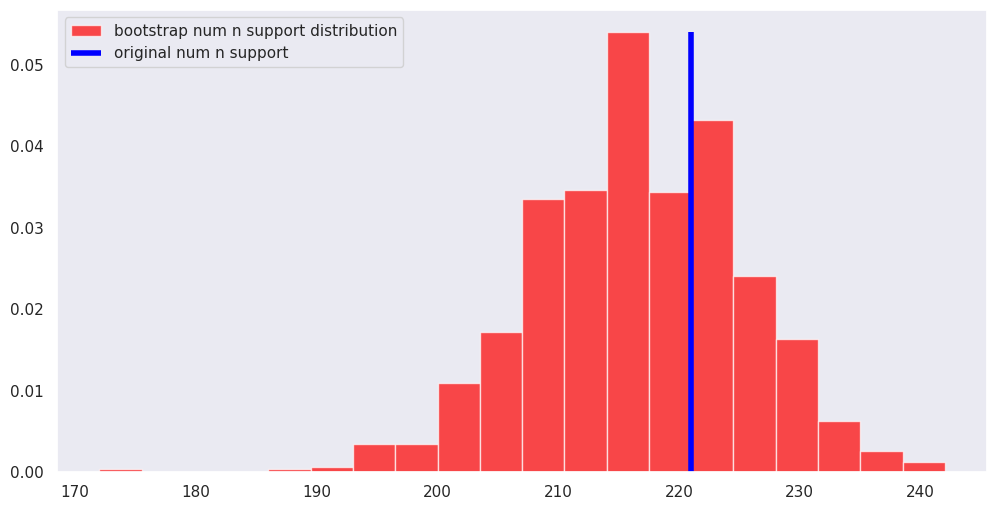

In [167]:
plt.figure(figsize=(12, 6))
plt.hist(bootstrap_n_support, bins=20,
         label='bootstrap num n support distribution',
         color='red', alpha=0.7, density=True)
plt.vlines(original_n_support,
           ymin=0,
           ymax=np.histogram(bootstrap_n_support, bins=20, normed=True)[0].max(),
           label='original num n support', color='blue', linewidth=4)
plt.grid()
plt.legend()
plt.show()

normal [203.9672, 238.0328]
percentile [199.0000, 233.0000]
inverse percentile [209.0000, 243.0000]


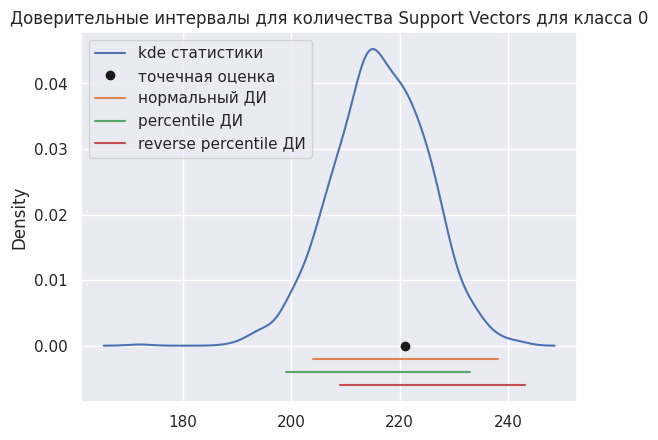

In [168]:
normal_ci = get_normal_ci(bootstrap_n_support, original_n_support, alpha)
percentile_ci = get_percentile_ci(bootstrap_n_support, alpha)
pivotal_ci = get_pivotal_ci(bootstrap_n_support, original_n_support, alpha)

sns.kdeplot(bootstrap_n_support, label='kde статистики')
plt.plot([original_n_support], [0], 'o', c='k', markersize=6, label='точечная оценка')
d = 0.002
plt.plot(normal_ci, [-d, -d], label='нормальный ДИ')
plt.plot(percentile_ci, [-d*2, -d*2], label='percentile ДИ')
plt.plot(pivotal_ci, [-d*3, -d*3], label='reverse percentile ДИ')

plt.title('Доверительные интервалы для количества Support Vectors для класса 0')
plt.legend()
plt.show()

А как можно было бы оценить ДИ для параметров других типов моделей?
* Наивный Байес
* Линейная регрессия

# Выводы

По итогу, в результате данного семинара, мы познакомились со следующими техниками:
* Наивный/перцентильный/квантильный bootstrap
* t-bootstrap
* Reverse percentile bootstrap
* BCA-bootstrap

#### Источники мудрости
[1] [Tim Hesterberg "What Teachers Should Know about the Bootstrap:Resampling in the Undergraduate StatisticsCurriculum?"](https://arxiv.org/pdf/1411.5279.pdf)

[3] [Английская википедия](https://en.wikipedia.org/wiki/Bootstrapping_(statistics))

### Ссылочки


* [ДЗ прошлого года](https://github.com/bdemeshev/psmo_2022-23/blob/main/ha_02/psmo-ha_02.pdf)
* [Реализация в scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html)
* [Статья на хабре](https://habr.com/ru/companies/X5Tech/articles/679842/)
* [Описание принципов подсчёта разных бутстрэп интервалов](https://ocw.mit.edu/courses/18-05-introduction-to-probability-and-statistics-spring-2014/77906546c17ee79eb6e64194175e82ed_MIT18_05S14_Reading24.pdf)
* [BCA-bootstrap](https://www.erikdrysdale.com/bca_python/)